$$
\begin{bmatrix}
m_1 & 0 \\ 0 & m_2
\end{bmatrix} 
\begin{Bmatrix}
\ddot{x}_1 \\ \ddot{x}_2
\end{Bmatrix} + 
\begin{bmatrix}
k_1 + k_2 & -k_2 \\ -k_2 & k_2 + k_3
\end{bmatrix}
\begin{Bmatrix}
{x}_1 \\ {x}_2
\end{Bmatrix} =
\begin{Bmatrix}
0 \\ 0
\end{Bmatrix}
$$
$$ \bold{M}\bold{\ddot{x}} + \bold{K}\bold{{x}} = 0 $$
$$ [-\omega^2\bold{M} + \bold{K}]\bold{u} = 0 $$

$$
q_i = \sum_{i=i}^N\frac{f_i^*}{-m_i^*\omega^2+k_i^*}, \quad
\{x_i\} = \sum_{i=i}^N\frac{f_i^*}{-m_i^*\omega^2+k_i^*}\{{\varphi_i}\}
$$

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
def create_stiffness_matrix(k_values):
    '''剛性マトリックス作成'''

    n = len(k_values) - 1
    k = np.zeros((n, n))

    for i in range(n):
        k[i, i] = k_values[i] + k_values[i + 1]
        if i < n - 1:
            k[i, i + 1] = -k_values[i + 1]
            k[i + 1, i] = -k_values[i + 1]

    return k

質量、剛性、外力の設定

In [3]:
m_values = [50000, 50000, 50000]
k_values = [300000, 200000, 500000, 200000]
f_value = [2, 1, 3]
m_values = [10, 10]
k_values = [10000, 10000, 10000]
f_value = [2, 1]

質量マトリックス、剛性マトリックス、外力ベクトル

In [4]:
mass_matrix = np.diag(m_values)
stiffness_martix = create_stiffness_matrix(k_values)
force_vector = np.array(f_value)
mass_matrix, stiffness_martix, force_vector

(array([[10,  0],
        [ 0, 10]]),
 array([[ 20000., -10000.],
        [-10000.,  20000.]]),
 array([2, 1]))

固有値、固有ベクトルより、固有角振動数、固有ベクトルマトリックスを作成

In [5]:
mass_matrix_inv = np.linalg.inv(mass_matrix)
eigenvalues, eigenvectors = LA.eig(np.dot(mass_matrix_inv, stiffness_martix))
omega_n = np.sort(np.sqrt(eigenvalues)) # sqrt and sort
eigenvector_matrix = eigenvectors.T # transport
omega_n, eigenvector_matrix

(array([31.6227766 , 54.77225575]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

モード質量、剛性、外力を作成

In [6]:
m_modal = np.dot(eigenvector_matrix.T, np.dot(mass_matrix, eigenvector_matrix))
k_modal = np.dot(eigenvector_matrix.T, np.dot(stiffness_martix, eigenvector_matrix))
f_modal = np.dot(eigenvector_matrix.T, f_value)
m_modal, k_modal, f_modal

(array([[10.,  0.],
        [ 0., 10.]]),
 array([[10000.,     0.],
        [    0., 30000.]]),
 array([ 2.12132034, -0.70710678]))

モード変位から物理座標の変位を求める

In [7]:
def mode_disp(f, m, k, omega):
    q = f / (-m_modal[i][i]*omega**2 + k_modal[i][i])
    return q

omega_max = round(omega_n[-1], 0)+10
X = []
for omega in np.arange(1, omega_max, 0.1):
    q_vector = []
    for i, (f, m, k) in enumerate(zip(f_modal, m_modal, k_modal)):
        q_vector.append(mode_disp(f, m, k, omega))
    x_vector = np.abs(np.dot(eigenvector_matrix, q_vector))
    X.append(x_vector)

グラフ表示

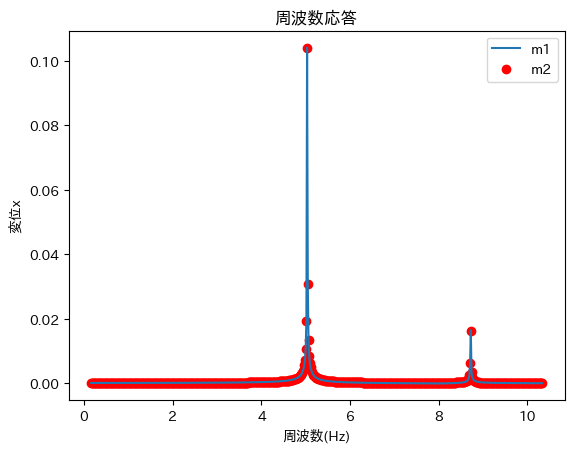

In [12]:
f_range = np.arange(1, omega_max, 0.1) / np.pi/2
plt.plot(f_range, [x[0] for i, x in enumerate(X)], label='m1')
plt.scatter(f_range, [x[1] for i, x in enumerate(X)], color='r', label='m2')
# plt.scatter(f_range, [x[2] for i, x in enumerate(X)], color='k', label='m3')
plt.title('周波数応答')
plt.xlabel('周波数(Hz)')
plt.ylabel('変位x')
plt.legend()
plt.show()